# Dataset   : https://www.kaggle.com/datasets/shibumohapatra/house-price/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/1553768847-housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

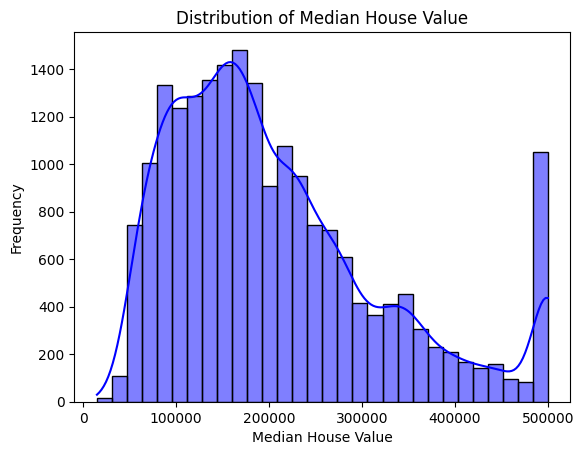

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['median_house_value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


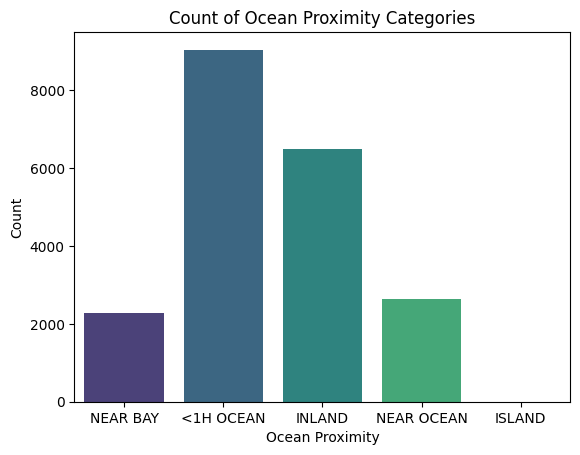

In [ ]:
sns.countplot(x='ocean_proximity', data=df, palette='viridis')
plt.title('Count of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()


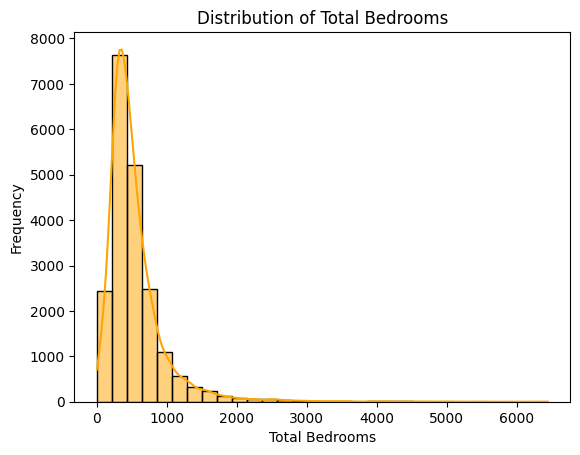

In [ ]:
sns.histplot(df['total_bedrooms'], kde=True, bins=30, color='orange')
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()


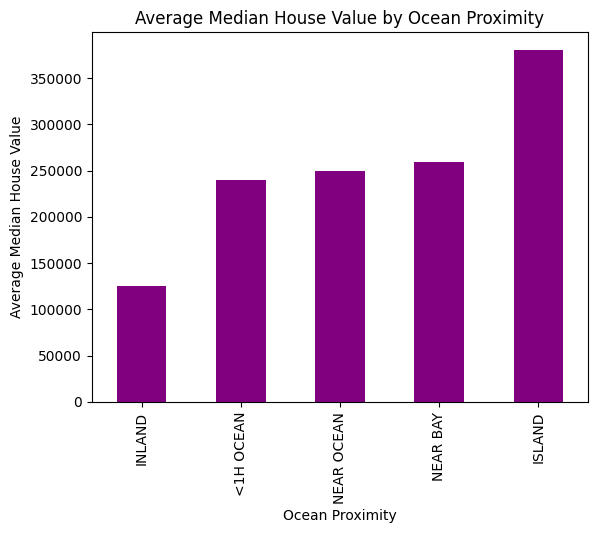

In [ ]:
df_grouped = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
df_grouped.plot(kind='bar', color='purple')
plt.title('Average Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median House Value')
plt.show()


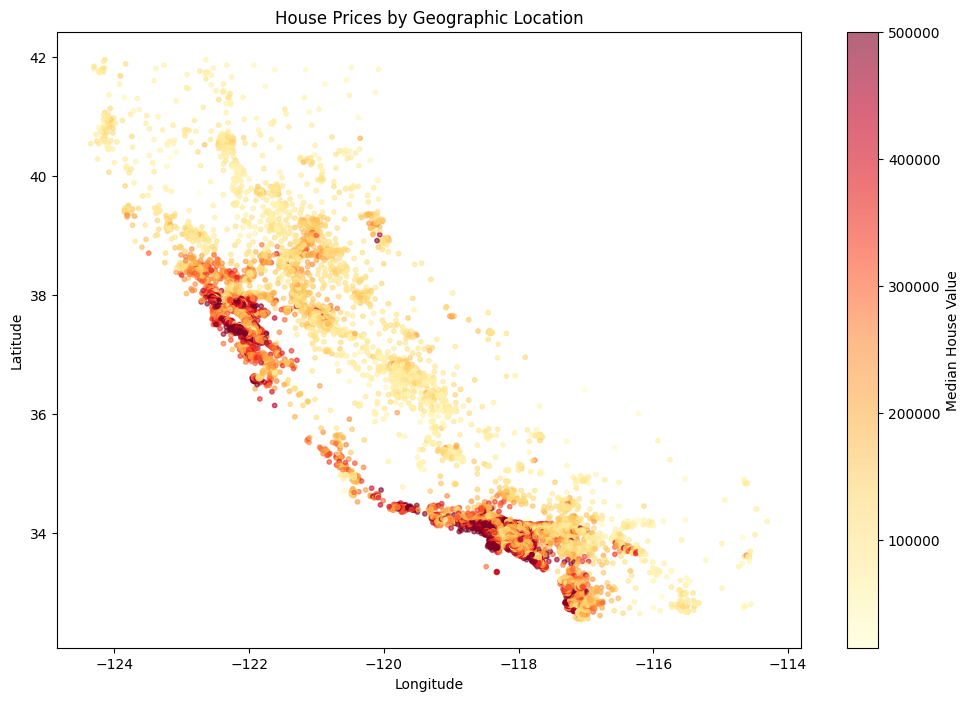

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='YlOrRd', alpha=0.6, s=10)
plt.colorbar(label='Median House Value')
plt.title('House Prices by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


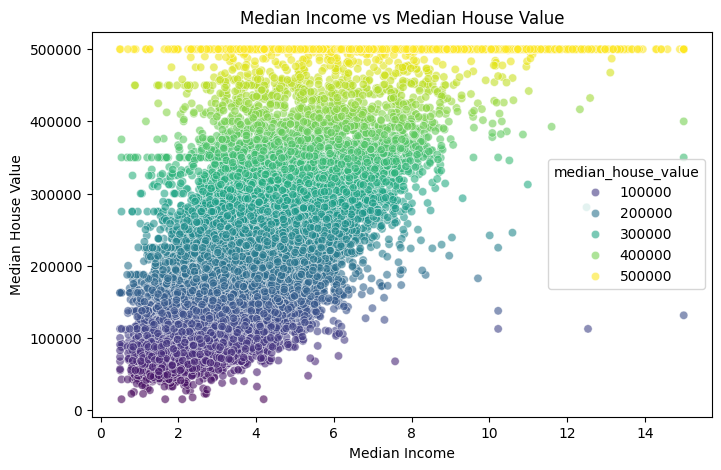

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.6, hue='median_house_value', palette='viridis')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


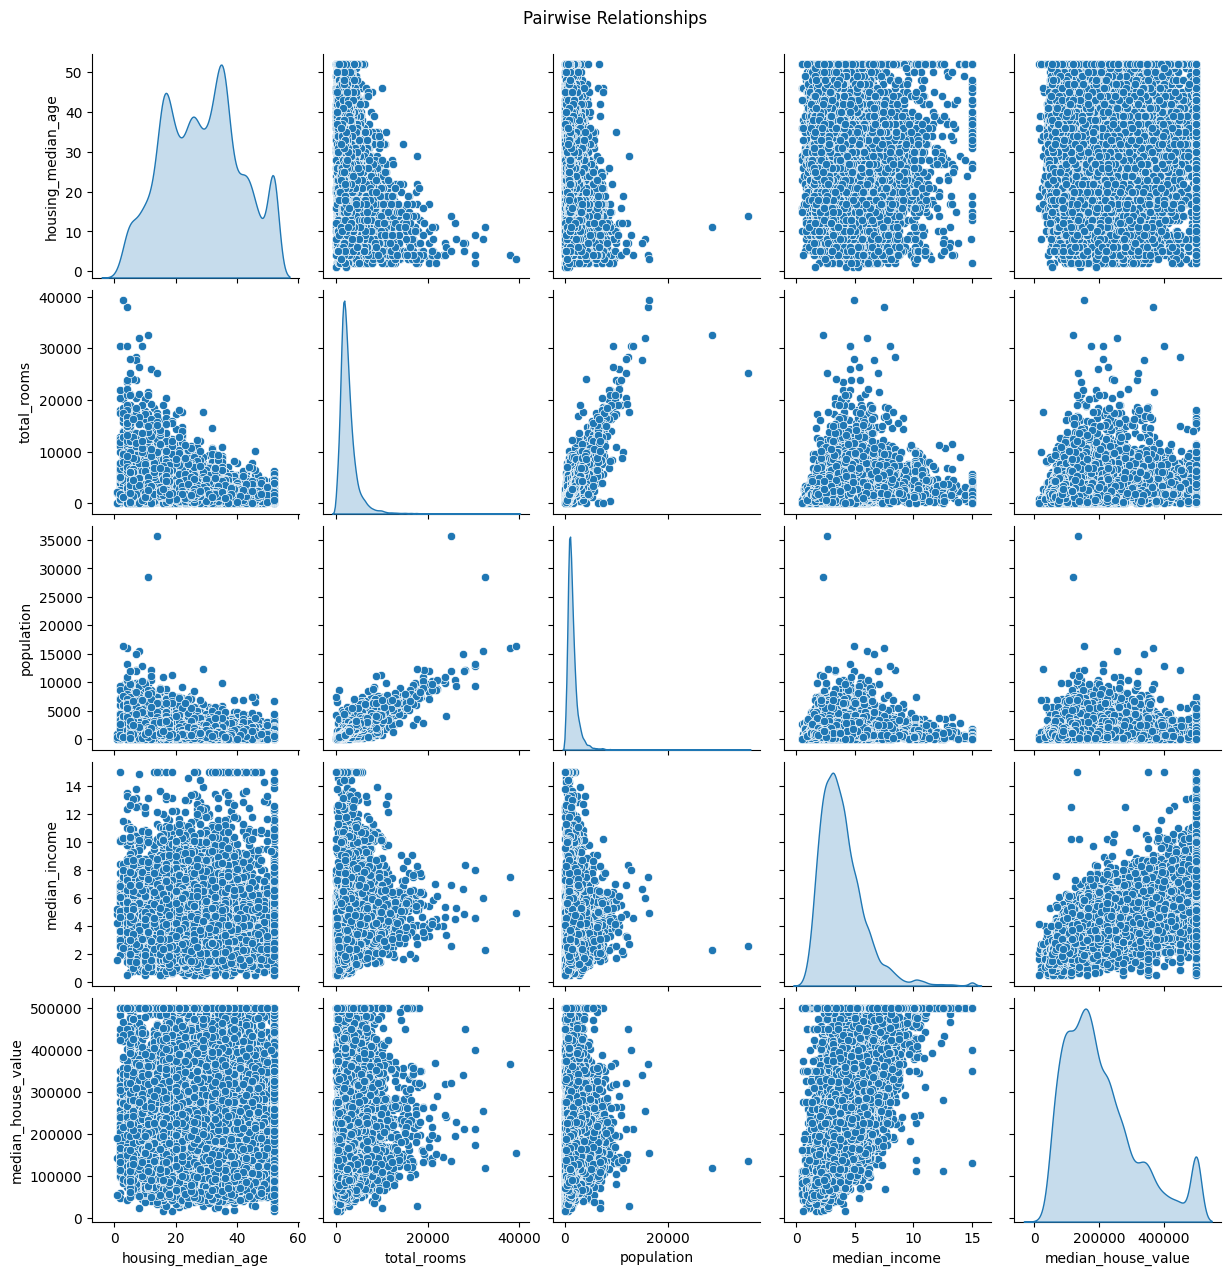

In [ ]:
sns.pairplot(df[['housing_median_age', 'total_rooms', 'population', 'median_income', 'median_house_value']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


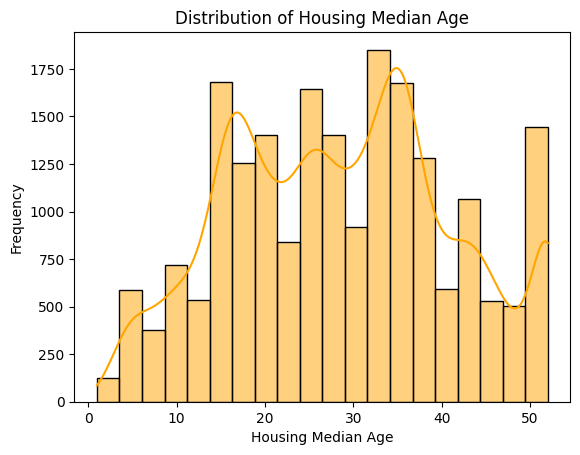

In [ ]:
sns.histplot(df['housing_median_age'], kde=True, bins=20, color='orange')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()


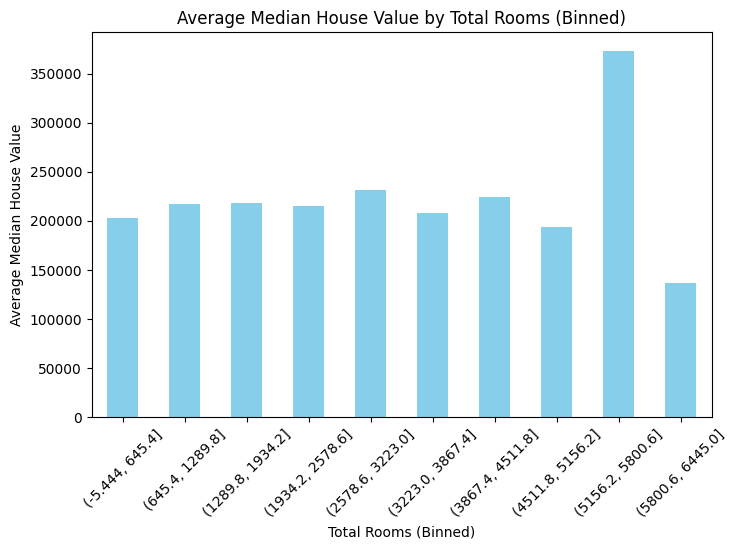

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot = df.groupby(pd.cut(df['total_bedrooms'], bins=10))['median_house_value'].mean()

# Plot the bar plot
plt.figure(figsize=(8, 5))
pivot.plot(kind='bar', color='skyblue')
plt.title('Average Median House Value by Total Rooms (Binned)')
plt.xlabel('Total Rooms (Binned)')
plt.ylabel('Average Median House Value')
plt.xticks(rotation=45)
plt.show()


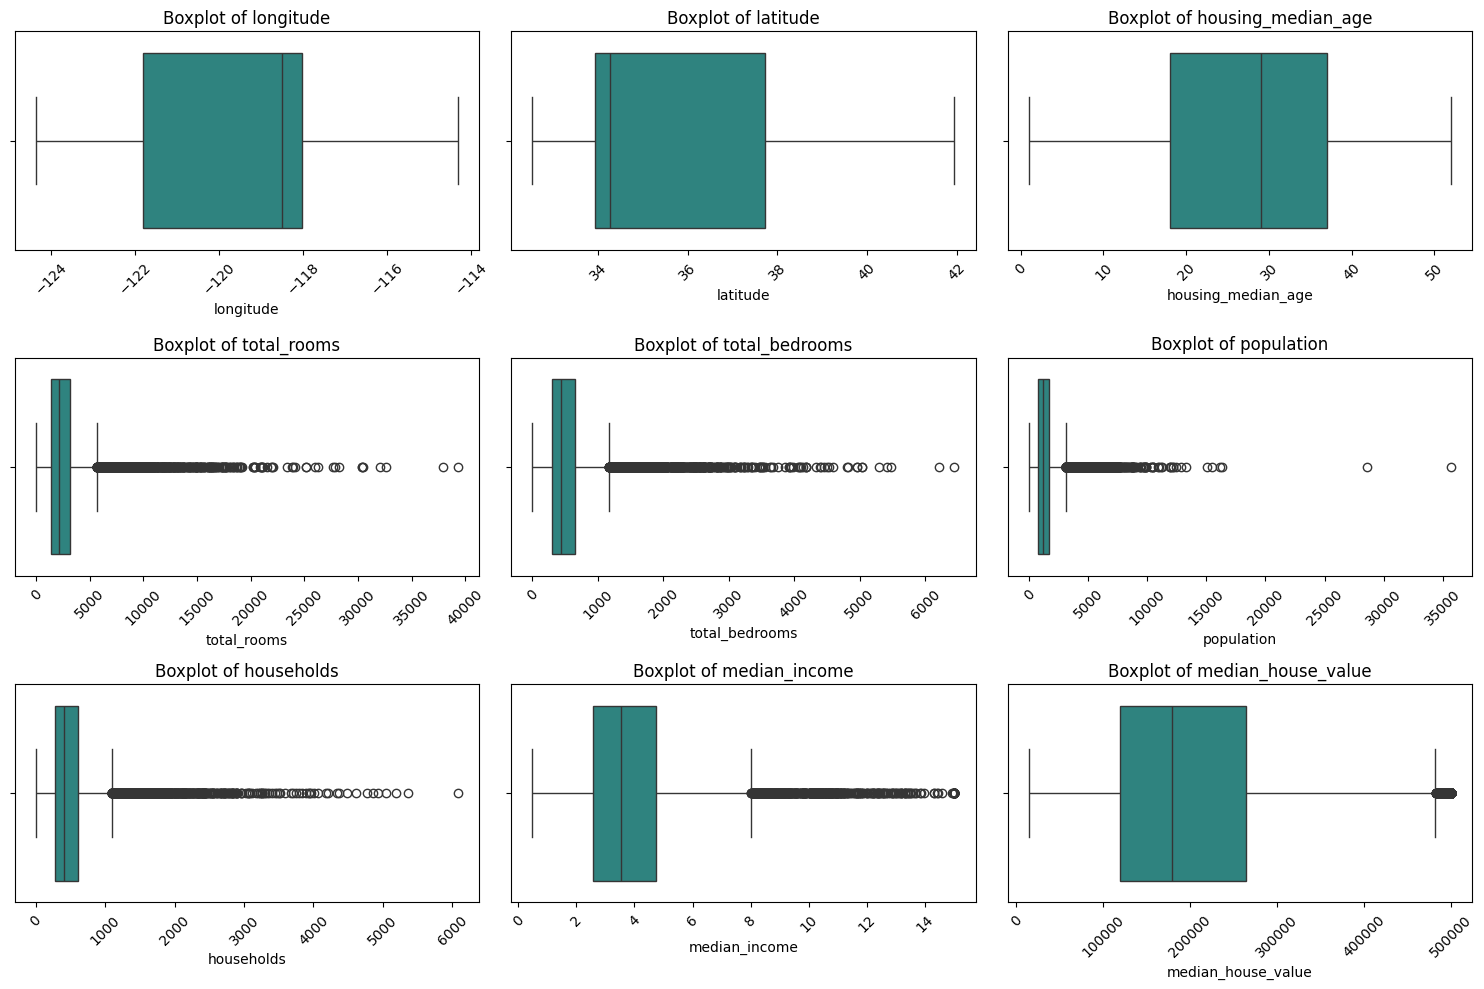

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# Handling outliers using IQR (Interquartile Range)
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Call the function to remove outliers
df_no_outliers = remove_outliers(df)
print(f"Data after removing outliers: {df_no_outliers.shape}")


Data after removing outliers: (16724, 10)


In [ ]:
# Handling outliers using IQR (Interquartile Range)
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Call the function to remove outliers
df_no_outliers = remove_outliers(df)
print(f"Data after removing outliers: {df_no_outliers.shape}")

# Display the first few rows of the cleaned data
df_no_outliers.head()


Data after removing outliers: (16724, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200


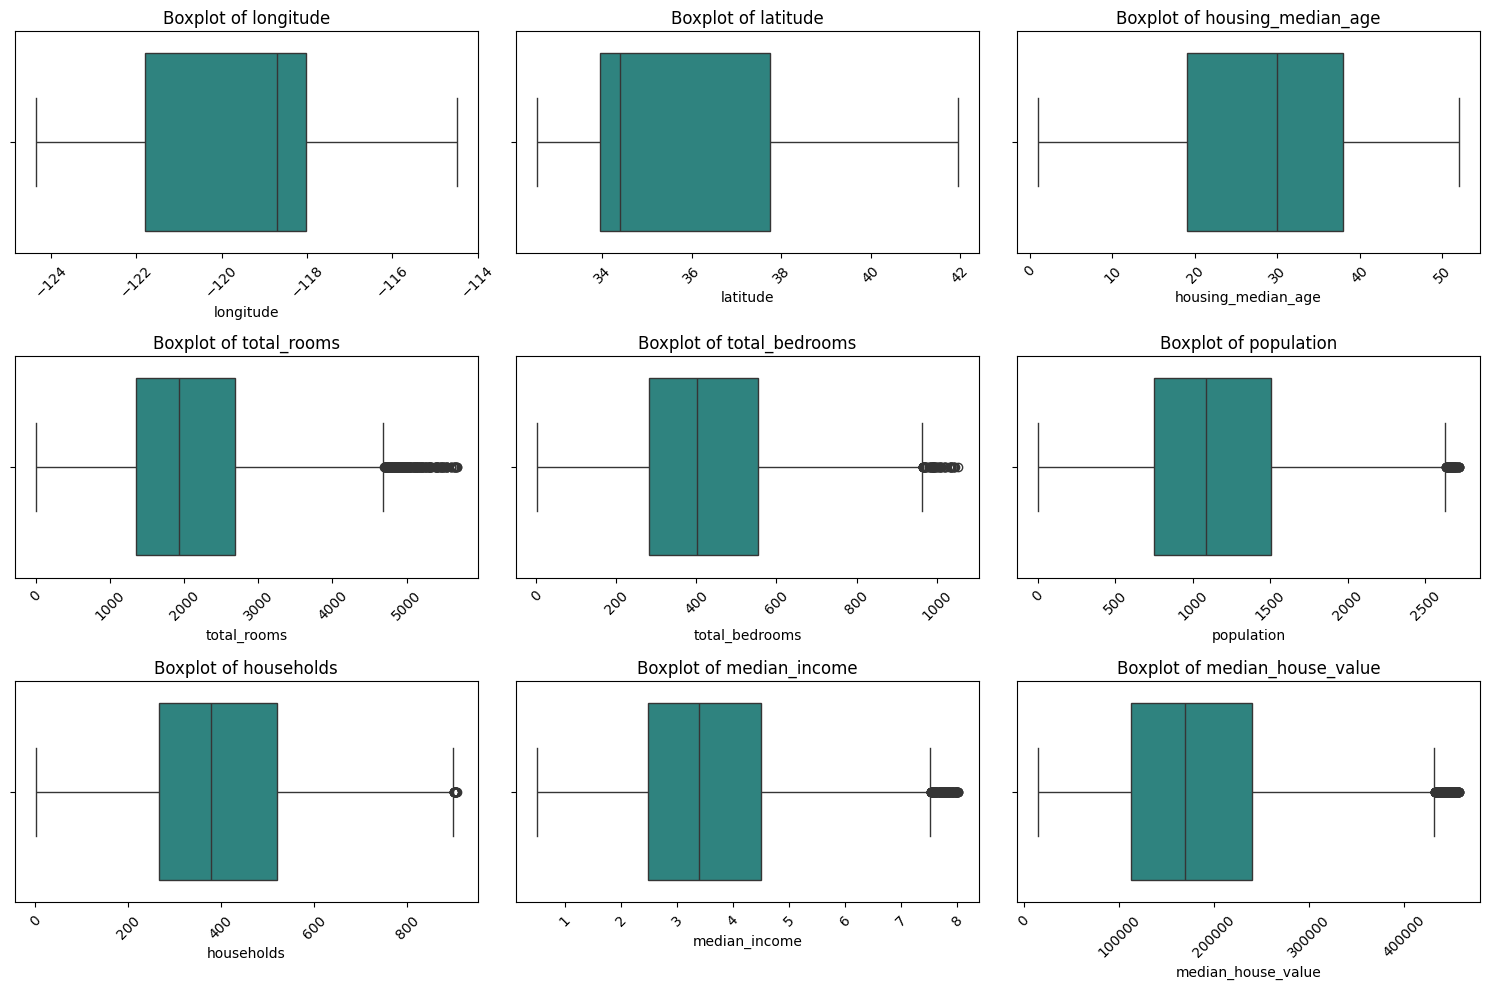

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers in the cleaned data
numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric column in the cleaned data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(data=df_no_outliers, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all columns (only categorical columns will be affected)
for col in df.columns:
    if df[col].dtype == 'object':  # Only apply label encoding to categorical columns
        df[col] = label_encoder.fit_transform(df[col])

# Display the updated dataframe
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322         126         8.3252                3              452600  
1        2401        1138         8.3014                3              358500  
2         496         177         7.2574                3              352100  
3         558         219         5.6431                3              341300  
4         565         259         3.8462                3              342200  


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # All columns except the target
y = df['median_house_value']  # The target column

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")


Training data shape (X_train): (16346, 9)
Testing data shape (X_test): (4087, 9)


Model: ElasticNet
R-squared (Accuracy): 0.60
----------------------------------------
Model: Lasso Regression
R-squared (Accuracy): 0.64
----------------------------------------
Model: Ridge Regression
R-squared (Accuracy): 0.64
----------------------------------------
Model: Gradient Boosting Regressor
R-squared (Accuracy): 0.77
----------------------------------------
Model: XGBoost Regressor
R-squared (Accuracy): 0.83
----------------------------------------


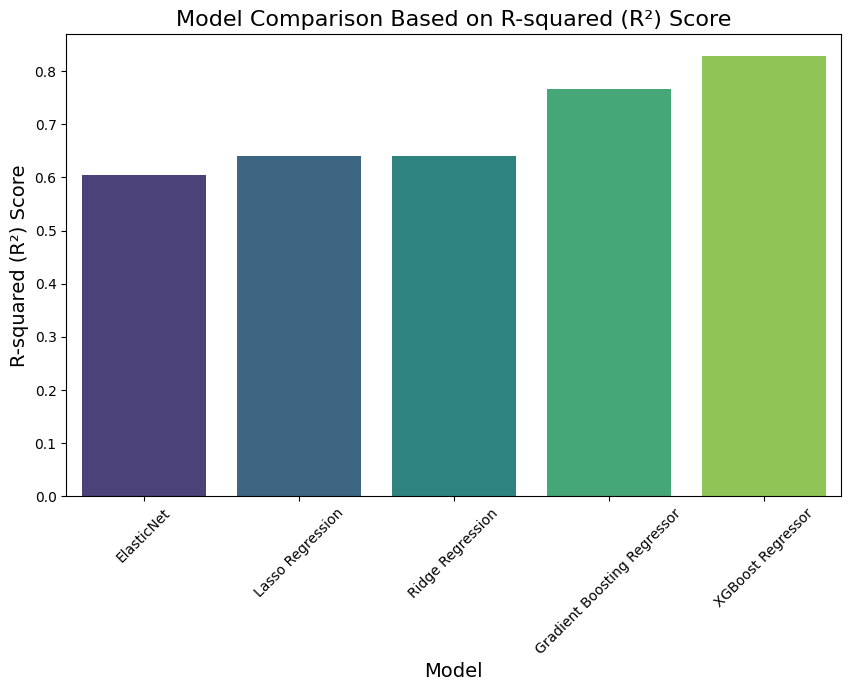

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

# Assuming you have your X_train, X_test, y_train, y_test data prepared

# Dictionary to store the new models
models = {
    "ElasticNet": ElasticNet(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Store the model names and their corresponding R-squared values
model_names = []
r2_scores = []

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared (R²) for model evaluation (accuracy)
    r2 = r2_score(y_test, y_pred)

    # Store model name and R² score
    model_names.append(name)
    r2_scores.append(r2)

    # Print model performance
    print(f"Model: {name}")
    print(f"R-squared (Accuracy): {r2:.2f}")
    print("-" * 40)

# Plotting the model comparison using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')

# Adding labels and title
plt.title('Model Comparison Based on R-squared (R²) Score', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R-squared (R²) Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


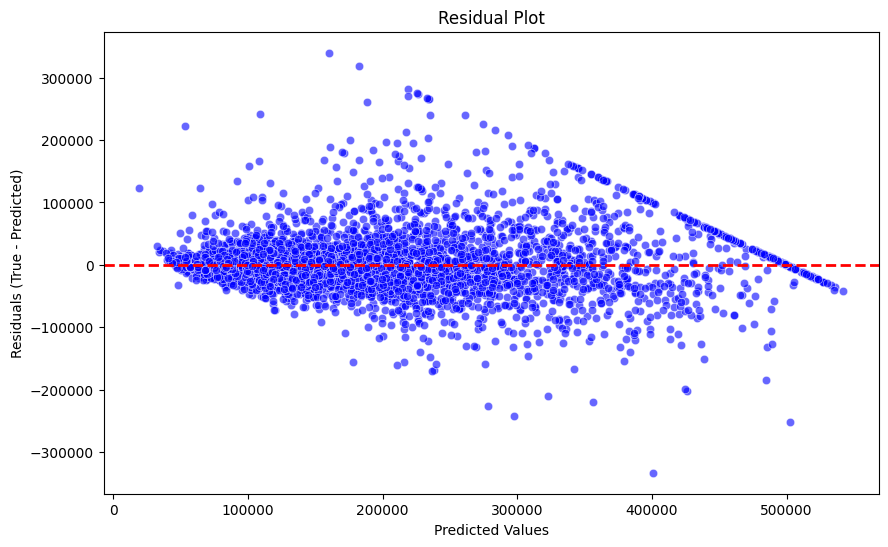

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting using your model (let's use XGBoost as an example)
y_pred = models['XGBoost Regressor'].predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.show()


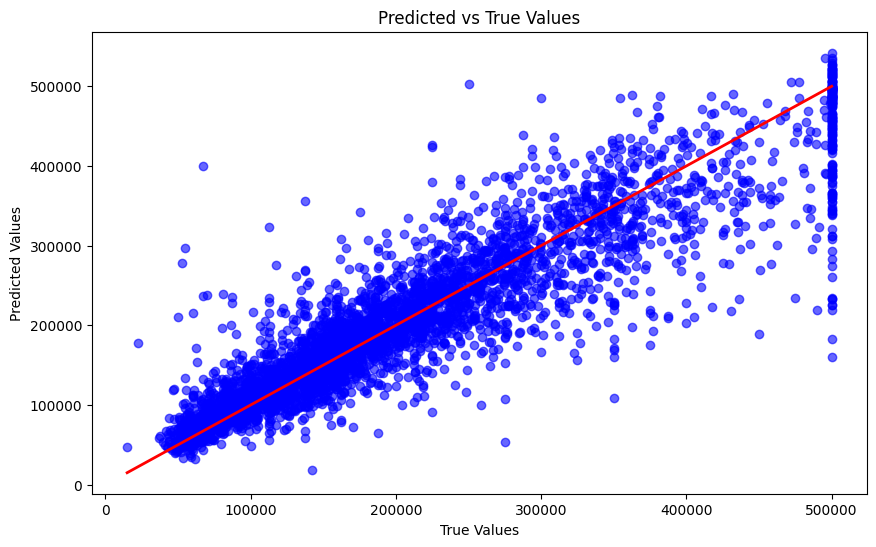

In [ ]:
# Predicting using the model
y_pred = models['XGBoost Regressor'].predict(X_test)

# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


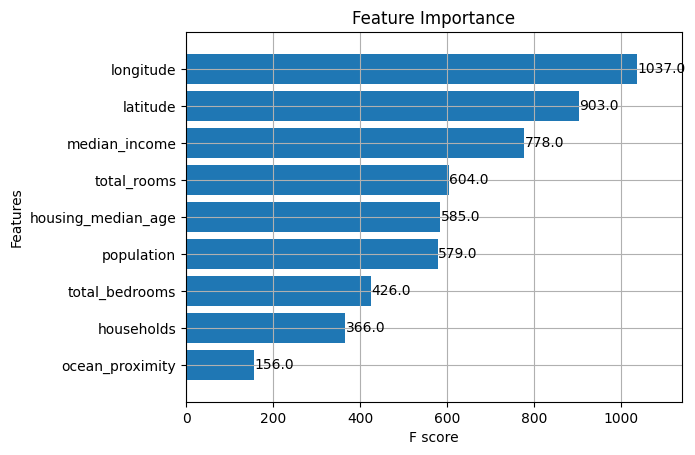

In [ ]:
import xgboost as xgb

# For XGBoost
model = models['XGBoost Regressor']
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance')
plt.show()


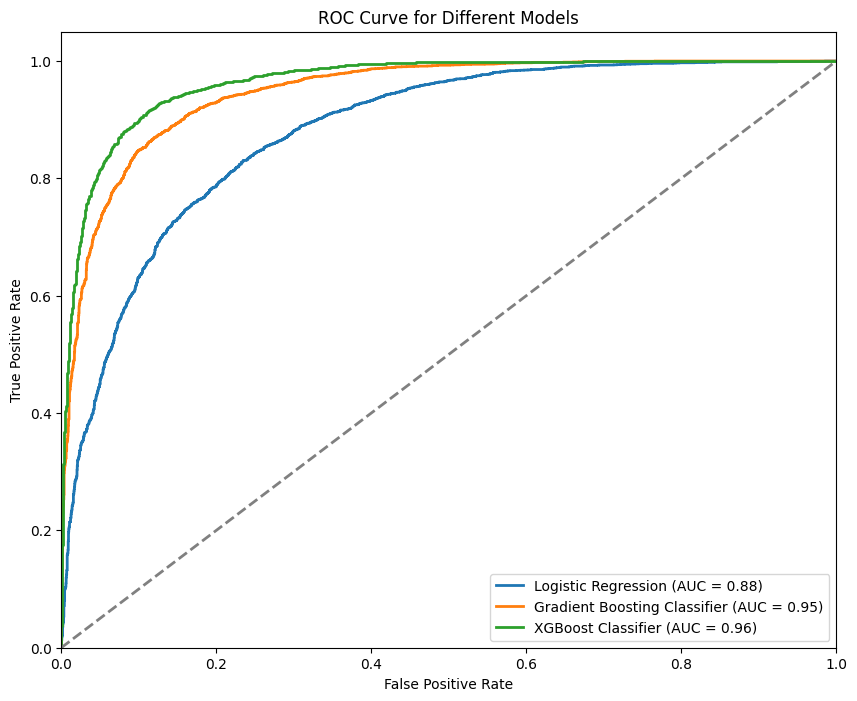

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Transform the regression target into categories (Low, High)
median_price = df['median_house_value'].median()
df['price_category'] = pd.cut(df['median_house_value'], bins=[0, median_price, df['median_house_value'].max()], labels=['Low', 'High'])

# Prepare the dataset (excluding 'median_house_value')
X = df.drop(columns=['median_house_value', 'price_category'])
y = df['price_category']

# Label encoding for the categorical target
le = LabelEncoder()
y = le.fit_transform(y)

# Dictionary of classification models for ROC curve
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": xgb.XGBClassifier(objective='binary:logistic', random_state=42)
}

# Prepare the model comparison plot
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Final plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()



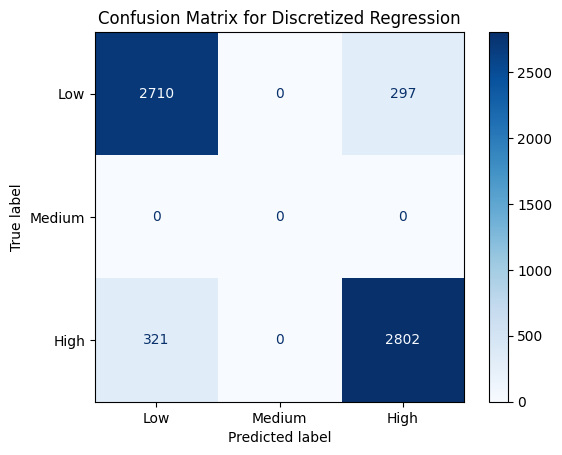

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_test_discretized = pd.cut(y_test, bins=3, labels=["Low", "Medium", "High"], include_lowest=True)
y_pred_discretized = pd.cut(y_pred, bins=3, labels=["Low", "Medium", "High"], include_lowest=True)

cm = confusion_matrix(y_test_discretized, y_pred_discretized, labels=["Low", "Medium", "High"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Discretized Regression")
plt.show()


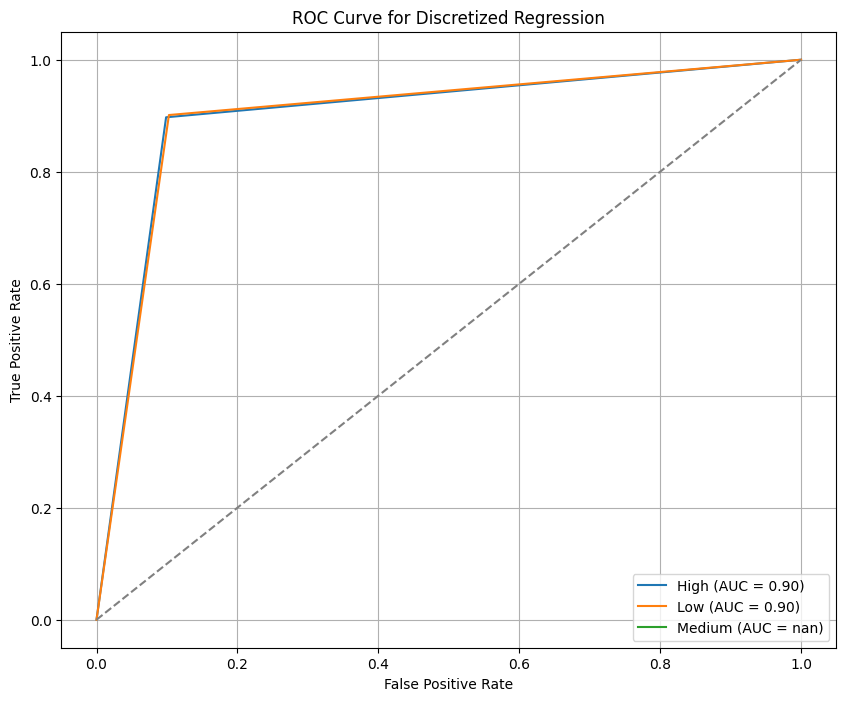

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
lb.fit(["Low", "Medium", "High"])

y_test_bin = lb.transform(y_test_discretized)
y_pred_bin = lb.transform(y_pred_discretized)

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Discretized Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [ ]:
# Assuming 'df' is your cleaned dataset (after any preprocessing)
df.to_csv('cleaned_dataset.csv', index=False)  # Save to CSV without the index